# Image Classification using CNN

CNN stands for Convolutionary Neural Network. Convolution stands for a pointwise multiplication of 2 functions to produce a third function. One of the functions here happens to be the image pixel matrix and another is the filter which shall be imposed upon the image. The dot product of the 2 function matrices causes the creation of an ‘Activation Map’ or a ‘Feature Map’.

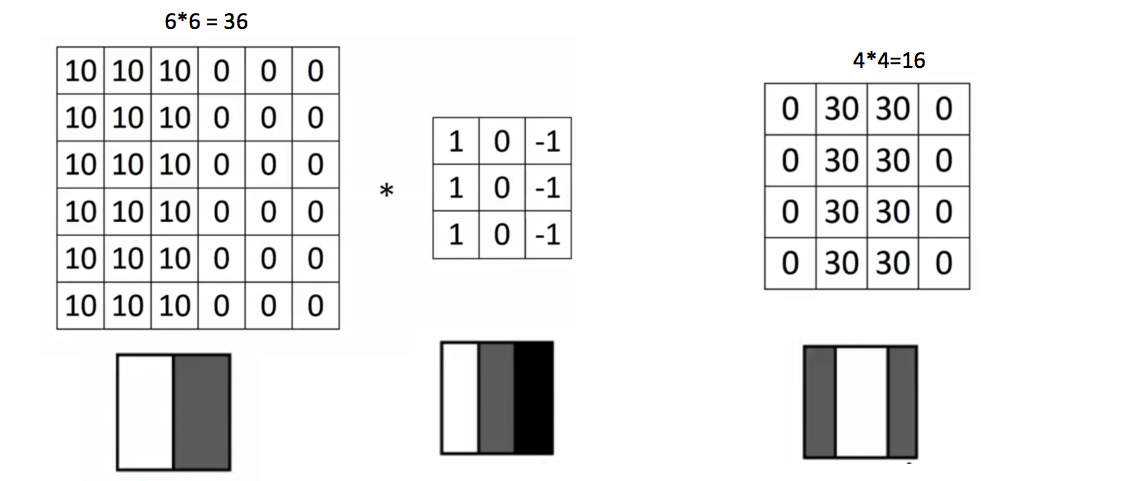

CNN has the ability to learn hierarchical features like edges, textures and shapes enabling accurate object detection. It is also capable of extracting meaningful spatial features from images. CNN consists of various layers:

**Input Layer:**

This layer takes raw images as input and are represented in the form of matrices of pixel values. Dimensions of input layers correspond to size of input images, i.e., height, width and color channels. 

**Convolution Layer:**

This layer is responsible for feature extraction. It consists of features, also known as kernels, which are convolved with the raw image inputs to capture relevant patterns and features. These layers learn to detect important edges, textures, shapes, layers and features. It provides with an output in the form of feature maps.

**Pooling Layers:**

This layer is responsible for reducing the spatial dimensions of the feature maps created by the convolution layer. It is responsible for performing down-sampling operations to retain the most salient features and information while discarding the unnecessary details. This helps in achieving translational invariance and reduced computational complexity.

- **Translational Invariance:** Property of a system or function that remains unchanged when it undergoes a translation (shift) in some specific direction. Eg.: • A translation-invariant system can recognize an object (e.g., a face) regardless of its position within the image.

**Fully Connected Layers:**

The output of the last pooling layers is flattened and connected to one or more fully connected layers. These fully connected layers act as **Traditional Neural Network Layers** and help in classification of the features extracted from the image. The role of the fully connected layers is to learn complex relationships between features and provide output in the form of class probabilities and predictions.

**Output Layer:**

This is the final layer of CNN and consists of neurons equal to the number of distinct classes in the classification task. The output layer provides each class’s classification probabilities or predictions, indicating the likelihood of the input image belonging to a particular class.

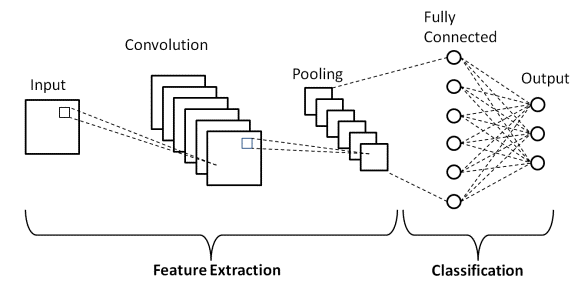

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


3


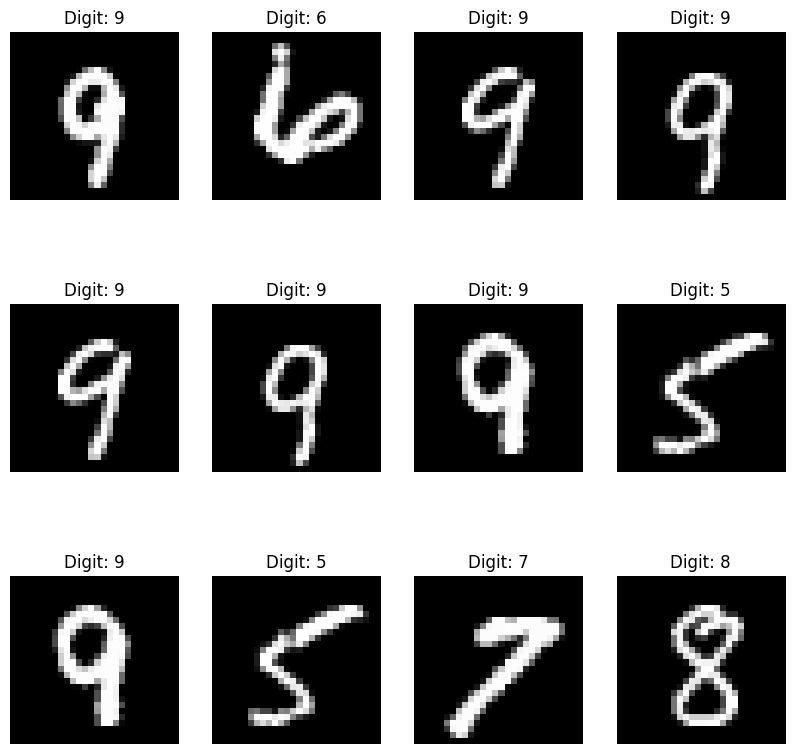

In [3]:
import random
n=7
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10,10))
indices = random.sample(range(len(x_train)), 12)
images = x_train[indices]
labels = y_train[indices]
for i in range(3):
    for j in range(4):
        index = i * 2 + j
        image = images[index].reshape((28, 28))  # Reshape the image to 28x28
        axs[i, j].imshow(image, cmap='gray')  # Plot the image
        axs[i, j].set_title(f"Digit: {labels[index]}")  # Add title with label
        axs[i, j].axis('off')  # Hide axis ticks and labels

print(y_train[n])

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

Hence, we can see here that the image size is (28x28) and the training dataset consists of 60,000 images to train the model. The testing dataset consists of 10,000 images of Handwritten digits.

To train the neural network with the image dataset, we require a 3 dimensional image and all the images given in the dataset are of 2 dimensions only. Hence, we use the reshape property to change the dimension of all the images to 3 dimensional images, i.e., (28x28x1)

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [9]:
x_train /= 255
x_test /= 255

## Creating the Model:

The `model = Sequential()` is used to simply define a private Convolutionary Neural Network where various layers can be added by using the `add()` method. It provides us with basic features like:
1) Accessing individual layers using indexing
2) Compiling entire model for training
3) Evaluating Model's Performance

1) Conv2D():
    It stands for Convolutional 2D layer. It extracts the spatial patterns and features from the images and outputs a feature map which consists of extracted features from the image.
2) MaxPooling2D():
    It represents the Pooling Layer and reduce the dimensionality of data while retaining the spatial features extracted by the Convolutional layer. In other words, it performs the downsampling operation.
3) Dropout():
    It is used to solve the problem of over fitting where the model performs well on training data but under-performs on the testing data leading to lower accuracies. It is a regularization technique.
4) Flatten():
    It reshapes the multi-dimensional input into a single-dimensional vector. This allows the data to be fed into fully-connected layers, which require 1D inputs.
5) Dense():
    It represents the Fully Connected Layer and connects each neuron in one layer to each neuron in the next layer, performs linear transformations based on weights and biases associated to each neuron and transforms the data's dimensionality to increase its feature complexity and adapt to the desired output.

In [10]:
batch_size = 128
num_classes = 10
epochs = 10
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy']) # compile() --> sets up important features like optimizer, losss function and metrics

## Training the Model

In [11]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
print("The model has been trained Successfully.")
model.save('mnist.h5')
print("Saving the model as 'mnist.h5'")

Epoch 1/10


469/469 [==============================] - 70s 147ms/step - loss: 2.2874 - accuracy: 0.1399 - val_loss: 2.2523 - val_accuracy: 0.3305
Epoch 2/10
469/469 [==============================] - 72s 153ms/step - loss: 2.2295 - accuracy: 0.2717 - val_loss: 2.1827 - val_accuracy: 0.4685
Epoch 3/10
469/469 [==============================] - 75s 159ms/step - loss: 2.1580 - accuracy: 0.3819 - val_loss: 2.0904 - val_accuracy: 0.5738
Epoch 4/10
469/469 [==============================] - 71s 152ms/step - loss: 2.0595 - accuracy: 0.4760 - val_loss: 1.9622 - val_accuracy: 0.6542
Epoch 5/10
469/469 [==============================] - 71s 152ms/step - loss: 1.9218 - accuracy: 0.5461 - val_loss: 1.7871 - val_accuracy: 0.7010
Epoch 6/10
469/469 [==============================] - 72s 154ms/step - loss: 1.7458 - accuracy: 0.5932 - val_loss: 1.5679 - val_accuracy: 0.7365
Epoch 7/10
469/469 [==============================] - 72s 153ms/step - loss: 1.5414 - accuracy: 0.6304 - val_loss: 1.3280 - val_accuracy: 0.7

c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving the model as 'mnist.h5'


## Evaluating the Model:

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss = ", score[0])
print("Test Accuracy = ", score[1])

Test Loss =  0.8131476640701294
Test Accuracy =  0.8259999752044678
